# FIN 401 - Practice Question

                                                                               Oussama Abouzaid

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
from IPython.display import display 
warnings.filterwarnings('ignore')

In [2]:
PATH = '/Users/abouzaid/Desktop/MA1/Finance/Practice question FIN 401/practice.csv'

In [3]:
df = pd.read_csv(PATH).fillna(0)

In [4]:
stats = df[['datadate', 'fyear', 'at', 'csho', 'dlc', 'dltt', 'dv', 'ebit', 'lt', 'ni', 'prstkc', 'mkvalt', 'prcc_f', 'sic']]
stats.datadate = stats.datadate.apply(lambda x: int(str(x)[0:4]))

## 1.Calculate the dividend payout ratio as cash dividends over net income

The column **div_payout_ratio** contains the divident payout ratio, as cash dividends over net income

In [5]:
stats['div_payout_ratio'] = stats['dv'].divide(stats['ni'], fill_value=0)

## 2. Calculate the repurchase payout ratio as repurchases over net income

The column **rep_payout_ratio** contains the repurchase payout ratio, as repurchases over net income

In [6]:
stats['rep_payout_ratio'] = stats['prstkc'].divide(stats['ni'], fill_value=0)

## 3. Calculate the total payout ratio as the sum of the two ratios

In [7]:
stats['total_payout_ratio'] = stats['rep_payout_ratio'] + stats['div_payout_ratio']
stats = stats.fillna(0).replace(np.inf, 0)

## 4. Summary statistics for the payout ratios 

In [8]:
q4 = stats[['div_payout_ratio', 'rep_payout_ratio', 'total_payout_ratio']].fillna(0).replace(np.inf, 0).describe()
q4.loc[['mean', '25%', '50%', '75%', 'std', 'min', 'max']].transpose()

,mean,25%,50%,75%,std,min,max
div_payout_ratio,0.196281,0.0,0.0,0.000000,6.750525,-515.23913,632.428571
rep_payout_ratio,-0.097798,0.0,0.0,0.000000,64.363802,-15842.55000,1212.082192
total_payout_ratio,0.098482,0.0,0.0,0.122123,65.000769,-15842.55000,1696.493151


**N.B:** In the above statistics, '50%' refers to the 50% quantile, which is the median 

**To represent the distribution of both ratios, we decided to take a sample of 300 datapoints for each ratio, to avoid having biased distributions due a very large number of zero ratios.**

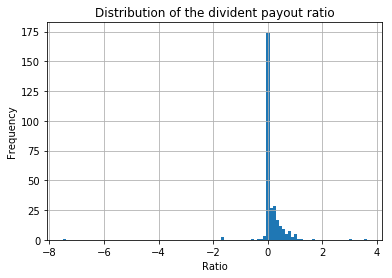

In [9]:
stats[['div_payout_ratio']][:300].hist(bins=100)
plt.title('Distribution of the divident payout ratio')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.show()

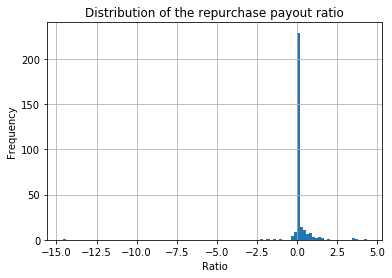

In [10]:
stats[['rep_payout_ratio']][:300].hist(bins=100)
plt.title('Distribution of the repurchase payout ratio')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.show()

## Question 5

In [11]:
negative_incomes = stats[(stats['ni'] < 0)]
positive_incomes = stats[(stats['ni'] > 0)]
q5 = positive_incomes[['div_payout_ratio', 'rep_payout_ratio', 'total_payout_ratio']]\
    .fillna(0).replace(np.inf, 0).describe().loc[['mean', '25%', '50%', '75%', 'std', 'min', 'max']].transpose()

**Here are the firms who have negative values of net income, in each year of the sample period:**

In [12]:
negative_incomes.groupby('datadate').count()[['ni']]

,ni
datadate,
2006,3416
2007,3549
2008,4216
2009,4226
2010,3525


**And here is a summary statistics for the payout ratios only for the firms withpositive values of net income.**

In [13]:
q5

,mean,25%,50%,75%,std,min,max
div_payout_ratio,0.747654,0.0,0.068065,0.470972,9.192161,0.000000,632.428571
rep_payout_ratio,0.611071,0.0,0.000000,0.189638,10.445167,-0.033387,1212.082192
total_payout_ratio,1.358725,0.0,0.304090,0.888933,15.943752,-0.006663,1696.493151


## 6.  The percentages of firms with a given payout policy, grouped firms by calendar year

In [14]:
#Calculating the ratios for the dividend payout ratios
ratio_div_payout = stats[(stats['div_payout_ratio'] > 0) & (stats['rep_payout_ratio'] == 0)]
ratio_div_payout = ratio_div_payout.groupby('datadate')['at'].describe()[['count']]
ratio_div_payout = ratio_div_payout.divide(stats.groupby('datadate')['at'].describe()[['count']])*100
ratio_div_payout

,count
datadate,
2006,13.488183
2007,10.888298
2008,9.137762
2009,10.780118
2010,12.359460


In [15]:
#Calculating the ratios for the repurchase payout ratios
ratio_rep_payout = stats[(stats['div_payout_ratio'] == 0) & (stats['rep_payout_ratio'] > 0)]
ratio_rep_payout = ratio_rep_payout.groupby('datadate')['at'].describe()[['count']]
ratio_rep_payout = ratio_rep_payout.divide(stats.groupby('datadate')['at'].describe()[['count']]) * 100
ratio_rep_payout

,count
datadate,
2006,6.291769
2007,6.764919
2008,6.757199
2009,5.826201
2010,6.131198


In [16]:
def plot_ratios(div, rep, title=''):
    ratios = pd.DataFrame()
    ratios['Divident payout ratio'] = div
    ratios['Repurchase payout ratio'] = rep
    ratios.plot(grid=True)
    plt.xlabel('Years')
    plt.ylabel('Ratios (%)')
    plt.title('Evolution of dividend and repurchase payout ratios {}'.format(title))
    plt.show()

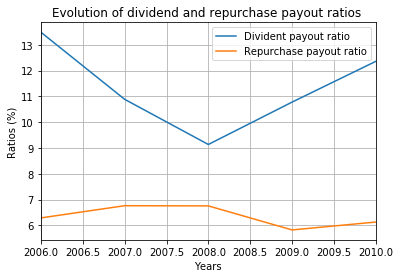

In [17]:
plot_ratios(ratio_div_payout['count'], ratio_rep_payout['count'])

## Question 7

**Ratio of policies used (divident vs. repurchase payout) within companies in a given sector, by year**

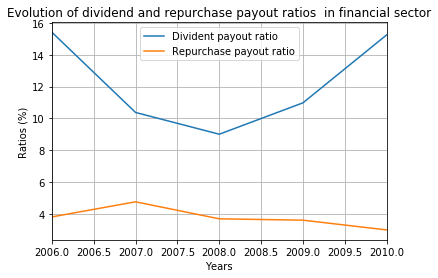

In [18]:
#Financial sector
finance = stats[(stats['sic'] >= 6000) & (stats['sic'] <= 6700)]
div_fin = finance[(finance['div_payout_ratio'] > 0) & (finance['rep_payout_ratio'] == 0)].groupby('datadate').count()[['at']]
rep_fin = finance[(finance['div_payout_ratio'] == 0) & (finance['rep_payout_ratio'] > 0)].groupby('datadate').count()[['at']]
a = div_fin.divide(finance.groupby('datadate').count()[['at']])['at'] * 100
b = rep_fin.divide(finance.groupby('datadate').count()[['at']])['at'] * 100
plot_ratios(a, b, ' in financial sector')

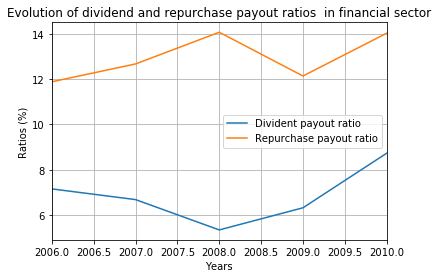

In [20]:
#High tech sector
SIC_CODES = [3571, 3572, 3575, 3577, 3578, 3661, 3663, 3669,\
             3671, 3672, 3674, 3675, 3677, 3678, 3679, 3823,\
             3825, 3826, 3827, 3829, 3841, 3845, 4812, 4813,\
             4899, 7371, 7372, 7373, 7374, 7375, 7378, 7379]

high_tech = stats[stats['sic'].isin(SIC_CODES)]
div_ht = high_tech[(high_tech['div_payout_ratio'] > 0) & (high_tech['rep_payout_ratio'] == 0)]\
                        .groupby('datadate').count()[['at']]
rep_ht = high_tech[(high_tech['div_payout_ratio'] == 0) & (high_tech['rep_payout_ratio'] > 0)]\
                        .groupby('datadate').count()[['at']]
a = div_ht.divide(high_tech.groupby('datadate').count()[['at']])['at'] * 100
b = rep_ht.divide(high_tech.groupby('datadate').count()[['at']])['at'] * 100
plot_ratios(a, b, ' in financial sector')